In [1]:
import os 
os.chdir("../") # To read the data from the root folder

In [2]:
import pandas as pd
import duckdb

# lets explore a little bit the features of data

## lets count the number of rows in the dataset

In [3]:
con = duckdb.connect()

file_1_path = 'data/sample_data_0006_part_00.parquet'

query = f"""
    SELECT 
        COUNT(*) AS total_rows
    FROM 
        '{file_1_path}'
"""

result = con.execute(query).df()
result

,total_rows
0,10758418


### GEt the period of time covered by the dataset

In [4]:
query = f"""
    SELECT 
        MIN(transaction_date) AS start_date,
        MAX(transaction_date) AS end_date
    FROM 
        '{file_1_path}'
"""
result = con.execute(query).df()
result

,start_date,end_date
0,2021-01-01 00:01:13,2021-11-30 23:59:49


### Now lets find the number of colums and their data types

In [5]:
query = f"""
    DESCRIBE SELECT * FROM '{file_1_path}' 
"""

columns_info = con.execute(query).df()
columns_info

,column_name,column_type,null,key,default,extra
0,merchant_id,VARCHAR,YES,None,None,None
1,_id,VARCHAR,YES,None,None,None
2,subsidiary,VARCHAR,YES,None,None,None
3,transaction_date,TIMESTAMP,YES,None,None,None
4,account_number,VARCHAR,YES,None,None,None
5,user_id,VARCHAR,YES,None,None,None
6,transaction_amount,"DECIMAL(24,8)",YES,None,None,None
7,transaction_type,VARCHAR,YES,None,None,None


### Ok so now lets get some rows to check the data

In [6]:
query = f"""
    SELECT
        *
    FROM
        '{file_1_path}'
    LIMIT 10
"""

sample_df = con.execute(query).df()
sample_df

,merchant_id,_id,subsidiary,transaction_date,account_number,user_id,transaction_amount,transaction_type
0,075d178871d8d48502bf1f54887e52fe,aa8dacff663072244d0a8ab6bbe36b93,824b2af470cbe6a65b15650e03b740fc,2021-09-12 18:32:03,648e257c9d74909a1f61c54b93a9e1b3,ba42d192a145583ba8e7bf04875f837f,178.333650,CREDITO
1,075d178871d8d48502bf1f54887e52fe,a53bb81bd0bba2ae2535bda7ea5a550c,2d8d34be7509a6b1262336d036fdb324,2021-09-12 18:31:58,c0b62f9046c83ea5543ea46a497a4d6e,5cfff960ea6d732c1ba3e63d24f3be52,35.666730,CREDITO
2,075d178871d8d48502bf1f54887e52fe,79f893ea65c06fe2933f3847c88c272f,5eeb18254850b21af0a6bb2697913cd3,2021-09-12 18:31:56,872d10143fc0ac7d5de467806f6bef81,c97e63a92c82c7217b333635d75928ed,142.666920,CREDITO
3,075d178871d8d48502bf1f54887e52fe,ce577223699dbdc119df2ab8a35457fe,5221a599856c0a0588ed9ffd150edd3b,2021-09-12 18:31:10,2e35cfe7860a480a93e1c83e99843579,fc09bdd00f283222d65eaff4d00a6594,8.322237,CREDITO
4,075d178871d8d48502bf1f54887e52fe,0ce7ab2950e7a788a608f881aec0f8f0,971e55ef12d80ec070ea4f6750c8b892,2021-09-12 18:31:07,995bc89e4c4e00334f1f90c4a55f4729,213527e8ba94fcaf2f9378969f9f6abc,32.100057,CREDITO
5,075d178871d8d48502bf1f54887e52fe,01220d4c4ed48cfd6f7ca5f278f9a6f6,76aca4525838053ca0d5ba8e37f1ffe8,2021-09-12 18:31:06,a32395153b2dc1383304bd2c33990a78,d1022ab075c2a2cf681398670d2bf8a1,59.444550,CREDITO
6,075d178871d8d48502bf1f54887e52fe,f02cabf07366d25120c9b2e7019a4205,6b102b2df10e986bd97b1b5713be0843,2021-09-12 18:30:55,2dd7afef1abfbfbbb68b6a31df70fc91,d6b9f3858016e0581e006ad574e23c6c,11.888910,CREDITO
7,075d178871d8d48502bf1f54887e52fe,fb12816c831921ff105fea2197ab26b1,3ae3115ca051e75384016f7dbe2e1c44,2021-09-12 18:30:44,b203ec1d2e5355a406451c5a664fd1fe,fed67132093416ba01a45b31d907d437,29.722275,CREDITO
8,075d178871d8d48502bf1f54887e52fe,faf1f94ffdcd14b92523439672079498,408c74e90c79b159c91267b8fdf11053,2021-09-12 18:30:15,8bd7618563c9e4e9c1cee885a8816188,09e64f7c1df4eb1acd93733bc7c699a7,23.777820,CREDITO
9,075d178871d8d48502bf1f54887e52fe,76d975dce75647824a3ff3d1c8e4fa4c,30e5a216a97f0b59114d79b0b69061a2,2021-09-12 18:29:45,c4703b5e8501767be83fe2b258ffc7ee,320b4b756f3584ee36738cf8cd60a581,41.611185,CREDITO


# Realizar conteos, unicos y nulos por

- Analizar
- Agrupar por `usuer_id`, `merchant_id` -> encontrar transacciones dobles en plazos de 24 horas

In [7]:
query = f"""
    SELECT 
        COUNT(DISTINCT _id) AS unique_ids,
        COUNT(DISTINCT user_id) AS unique_user_ids,
        COUNT(DISTINCT merchant_id) AS unique_merchant_ids,
        COUNT(DISTINCT subsidiary) AS unique_subsidiary_ids,
        COUNT(DISTINCT transaction_date) AS unique_transaction_dates,
        COUNT(DISTINCT account_number) AS unique_account_numbers,
        COUNT(transaction_amount) AS transaction_amounts,
        COUNT(DISTINCT transaction_type) AS unique_transaction_types
    FROM 
        '{file_1_path}'
"""
unique_counts = con.execute(query).df()
unique_counts

,unique_ids,unique_user_ids,unique_merchant_ids,unique_subsidiary_ids,unique_transaction_dates,unique_account_numbers,transaction_amounts,unique_transaction_types
0,10758411,1948844,3,16052,7615997,1954040,10758418,2


## ok so there was found important key facts:

- There are not as many _id as the total number of rows, maybe duplicates?
- There are only 3 merchant_ids, I was expecting more variety, but subsidiary ids are more varied with 16052 unique values
- There are a little bit more unique_accounts that user_ids, maybe users have more than one account?, but not many more

**First** we check the amount of null values in each column

In [8]:
query = f"""
    SELECT 
        SUM(CASE WHEN _id IS NULL THEN 1 ELSE 0 END) AS null_ids,
        SUM(CASE WHEN user_id IS NULL THEN 1 ELSE 0 END) AS null_user_ids,
        SUM(CASE WHEN merchant_id IS NULL THEN 1 ELSE 0 END) AS null_merchant_ids,
        SUM(CASE WHEN subsidiary IS NULL THEN 1 ELSE 0 END) AS null_subsidiary_ids,
        SUM(CASE WHEN transaction_date IS NULL THEN 1 ELSE 0 END) AS null_transaction_dates,
        SUM(CASE WHEN account_number IS NULL THEN 1 ELSE 0 END) AS null_account_numbers,
        SUM(CASE WHEN transaction_amount IS NULL THEN 1 ELSE 0 END) AS null_transaction_amounts,
        SUM(CASE WHEN transaction_type IS NULL THEN 1 ELSE 0 END) AS null_transaction_types
    FROM 
        '{file_1_path}'
"""

null_counts = con.execute(query).df()
null_counts

,null_ids,null_user_ids,null_merchant_ids,null_subsidiary_ids,null_transaction_dates,null_account_numbers,null_transaction_amounts,null_transaction_types
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### What are the duplicated values in _id column?

In [9]:
query = f"""
    SELECT 
        *
    FROM 
        '{file_1_path}'
    WHERE 
        _id IN (
        SELECT
            _id
        FROM 
            '{file_1_path}'
        GROUP BY 
            _id
        HAVING 
            COUNT(*) > 1
        )
"""

duplicated_ids = con.execute(query).df()
duplicated_ids

,merchant_id,_id,subsidiary,transaction_date,account_number,user_id,transaction_amount,transaction_type
0,075d178871d8d48502bf1f54887e52fe,53f3b7bf5cf7c5509279f385eedca459,09f6be1ff97081582f7ae1b4aa8e163e,2021-08-23 10:49:08,669223a6679cd07a026f97fe4b197651,157b9aa3eb0ad227e4580095c4e4e721,63.011223,CREDITO
1,075d178871d8d48502bf1f54887e52fe,53f3b7bf5cf7c5509279f385eedca459,09f6be1ff97081582f7ae1b4aa8e163e,2021-08-23 10:49:08,669223a6679cd07a026f97fe4b197651,157b9aa3eb0ad227e4580095c4e4e721,63.011223,CREDITO
2,838a8fa992a4aa2fb5a0cf8b15b63755,d737f8d70694471f3061002db7fb2ac1,fb06b4a71938b984fc729784c1db0fca,2021-09-05 15:44:13,79f3ffcf1cdf1d6e7166e9ef87d64247,cb5364b29887ac940a8fc0eb02f7e6e4,99.866844,CREDITO
3,838a8fa992a4aa2fb5a0cf8b15b63755,d737f8d70694471f3061002db7fb2ac1,fb06b4a71938b984fc729784c1db0fca,2021-09-05 15:44:13,79f3ffcf1cdf1d6e7166e9ef87d64247,cb5364b29887ac940a8fc0eb02f7e6e4,99.866844,CREDITO
4,075d178871d8d48502bf1f54887e52fe,c52a54da9927f445e5f621d6dac29bf4,ef6ca49817c5526c145d3cf89b79ba5b,2021-08-03 16:10:11,4e355451697d9365322913f3e4117503,4e6b357a05727beeb7d7faf836554683,23.777820,CREDITO
5,075d178871d8d48502bf1f54887e52fe,c52a54da9927f445e5f621d6dac29bf4,ef6ca49817c5526c145d3cf89b79ba5b,2021-08-03 16:10:10,4e355451697d9365322913f3e4117503,4e6b357a05727beeb7d7faf836554683,23.777820,CREDITO
6,075d178871d8d48502bf1f54887e52fe,52227fbe95311404092cbc8fbf2d320b,024b459a0851f51d731099ac10d1b30a,2021-08-26 14:58:58,8495c31cd0ba9c1c6ccf493cdf0e3558,6405b4845df13af0ca2f03714ff486c2,475.556401,CREDITO
7,075d178871d8d48502bf1f54887e52fe,52227fbe95311404092cbc8fbf2d320b,024b459a0851f51d731099ac10d1b30a,2021-08-26 14:58:58,8495c31cd0ba9c1c6ccf493cdf0e3558,6405b4845df13af0ca2f03714ff486c2,475.556401,CREDITO
8,075d178871d8d48502bf1f54887e52fe,b93a2bb461682a71f593049250e68a4e,da3fd12109b5ca658dae0e3c7906a295,2021-08-27 15:43:22,b5bd0f7cbf4d757287cd200d77a5a3cb,0c2cb49e26661d64eb28a05704c484d2,47.555640,CREDITO
9,075d178871d8d48502bf1f54887e52fe,b93a2bb461682a71f593049250e68a4e,da3fd12109b5ca658dae0e3c7906a295,2021-08-27 15:43:21,b5bd0f7cbf4d757287cd200d77a5a3cb,0c2cb49e26661d64eb28a05704c484d2,47.555640,CREDITO


#### Ok so it seems that duplicated rows correspond to the same transaction done more than once, maybe the user tried to pay again after a failed attempt? Maybe not because the hour of duplicated transactions concedes. So maybe is an duplicated error. So I will drop the first appearance of each duplicated _id

In [10]:
exclusion_query = f"""
    SELECT
        _id, 
        MIN(transaction_date) AS first_appearance
    FROM 
        '{file_1_path}'
    GROUP BY
        _id
    HAVING 
        COUNT(*) > 1
"""

exclusion_df = con.execute(exclusion_query).df()
exclusion_df

,_id,first_appearance
0,52227fbe95311404092cbc8fbf2d320b,2021-08-26 14:58:58
1,8f5418532506951085466a90e0359377,2021-09-08 10:20:40
2,b93a2bb461682a71f593049250e68a4e,2021-08-27 15:43:21
3,d737f8d70694471f3061002db7fb2ac1,2021-09-05 15:44:13
4,53f3b7bf5cf7c5509279f385eedca459,2021-08-23 10:49:08
5,c52a54da9927f445e5f621d6dac29bf4,2021-08-03 16:10:10
6,01dd3dc328d6c7e40453c509311f3b74,2021-09-17 16:19:27


### I want to perform a query to count the amount of subsidiaries per merchant

In [11]:
query = f"""
    SELECT 
        merchant_id,
        COUNT(DISTINCT subsidiary) AS unique_subsidiaries,
        COUNT(*) AS total_transactions        
    FROM 
        '{file_1_path}'
    GROUP BY 
        merchant_id
"""

subsidiary_counts = con.execute(query).df()
subsidiary_counts

,merchant_id,unique_subsidiaries,total_transactions
0,838a8fa992a4aa2fb5a0cf8b15b63755,6641,1876700
1,075d178871d8d48502bf1f54887e52fe,4178,1614618
2,817d18cd3c31e40e9bff0566baae7758,5233,7267100


# Now lets indentify the cases where transactional fractioning happened.

**First case:** we identify cases where same user in same day made more than 1 transaction to same merchant

In [12]:
query = f"""
    SELECT 
        user_id,
        merchant_id,
        DATE_TRUNC('day', transaction_date) as transaction_day,
        COUNT(*) AS transaction_counts
    FROM 
        '{file_1_path}'
    GROUP BY 
        user_id, 
        merchant_id, 
        DATE_TRUNC('day', transaction_date)
    HAVING
        COUNT(*) > 1
    ORDER BY 
        transaction_counts DESC
"""
fractioned_transactions_merchant = con.execute(query).df()
fractioned_transactions_merchant

,user_id,merchant_id,transaction_day,transaction_counts
0,71aa1651d9adc0b226107084fba3d71c,838a8fa992a4aa2fb5a0cf8b15b63755,2021-02-07,288
1,77704d483fbd7a54a0da2589b9eb4d14,838a8fa992a4aa2fb5a0cf8b15b63755,2021-01-23,200
2,684202021037f203f2f2258f5f1819a4,838a8fa992a4aa2fb5a0cf8b15b63755,2021-01-20,200
3,f578e090182426cd7196f66c0f77e90c,838a8fa992a4aa2fb5a0cf8b15b63755,2021-02-16,200
4,5e674596af22a66e826bf15b2a363cce,838a8fa992a4aa2fb5a0cf8b15b63755,2021-02-10,200
...,...,...,...,...
904393,a9f084d0b0b82e3134b0df30f315bd7f,075d178871d8d48502bf1f54887e52fe,2021-02-13,2
904394,6a7d58675d73b9f280aa105c752cae0d,075d178871d8d48502bf1f54887e52fe,2021-10-29,2
904395,98129c770728f069aebe081df0cb5b0b,075d178871d8d48502bf1f54887e52fe,2021-10-06,2
904396,4f52270f99b7cfea239a3ad1e9bf46bc,817d18cd3c31e40e9bff0566baae7758,2021-02-05,2


## Ok this is interesting, there are users that made up to 200 transactions in a single day to the same merchant.

- There are 904k fractioned transactions. THis is around

In [13]:
total_transactions = 10758418
perc_fractioned = (len(fractioned_transactions_merchant) / total_transactions) * 100

print(f"Percentage of fractioned transactions: {perc_fractioned:.2f}%")

Percentage of fractioned transactions: 8.41%


Considering that there are only 3 merchants, the percentage of fractioned transactions is not as high as I expected.

**Next:** Lets check the same, but this time using the subsidiary id instead of merchant id

In [14]:
frac_tran_subsidiary_query = f"""
    SELECT        
        user_id,
        subsidiary,
        DATE_TRUNC('day', transaction_date) as transaction_day,
        COUNT(*) AS transaction_counts,
        SUM(transaction_amount) AS total_transaction_amount,
        ROUND(SUM(transaction_amount) / NULLIF(COUNT(*), 0)) AS amount_per_transaction,
        ROW_NUMBER() OVER () AS label
    FROM 
        '{file_1_path}'
    GROUP BY 
        user_id, 
        subsidiary, 
        DATE_TRUNC('day', transaction_date)
    HAVING
        COUNT(*) > 1
    ORDER BY 
        transaction_counts DESC
"""
fractioned_transactions_subsidiary = con.execute(frac_tran_subsidiary_query).df()
fractioned_transactions_subsidiary

,user_id,subsidiary,transaction_day,transaction_counts,total_transaction_amount,amount_per_transaction,label
0,71aa1651d9adc0b226107084fba3d71c,4f511a84e8c4b1c09991e0d876e880ce,2021-02-07,271,5845.775869,22.0,600566
1,01c2e0350f7d77f4084502861b4989ff,f54e0b6b32831a6307361ed959903e76,2021-02-05,200,1189.374880,6.0,281456
2,e2d6158cc2b6467a47223cb2629f03f3,f54e0b6b32831a6307361ed959903e76,2021-02-02,200,1275.915446,6.0,462668
3,f9a10e0f56a96d244feadda0194fcb06,f54e0b6b32831a6307361ed959903e76,2021-02-02,200,1188.891002,6.0,48402
4,3739a3c32bf6f116edea1d45964cba92,f54e0b6b32831a6307361ed959903e76,2021-02-02,200,1188.891002,6.0,395917
...,...,...,...,...,...,...,...
678393,c3ba079c108d8257953e12ee87c7513b,46e5d05afcd8dc579b442a16fe6e5db7,2021-06-24,2,2377.782005,1189.0,678395
678394,505a4b2c5eeea11a9e131fc4ec9c8124,b5580beb29afc241b5c7130f78f90cf3,2021-07-31,2,166.444740,83.0,678396
678395,e7b6126dcfd717726768b752cce2f283,3ea88f376dc22adc4f5a20464a003940,2021-03-04,2,749.001332,375.0,678397
678396,1425088228f42313b5e275ee814fde4e,7ab74491621d8589238ec4b313d65f4c,2021-03-12,2,713.334601,357.0,678398


In [15]:
fractioned_transactions_subsidiary['transaction_counts'].sum()

np.int64(1832878)

- ok, 678398 fractioned transactions in the same day to same subsidiary by the same user

- Is it possible to perform fractioned transactions for the same market using two different subsidiaries? Maybe yes, but I think its not common. So lets mark them as safe, and i will only consider fractioned transactions when they are done to the same subsidiary.

**Question:** What is the percentage of fractioned transactions now?

In [16]:
total_transactions = 10758418

perc_fractioned = (len(fractioned_transactions_subsidiary) / total_transactions) * 100

print(f"Percentage of fractioned transactions: {perc_fractioned:.2f}%")

Percentage of fractioned transactions: 6.31%


# lets perform some prelimimary analysis on the fractioned transactions table.

- I would like to know the distribution of transaction counts, to check if the majority of fractioned transactions per day is low (like 2 or 3) or high (more than 10)
- also if it follows a known distribution like poisson, normal, etc.

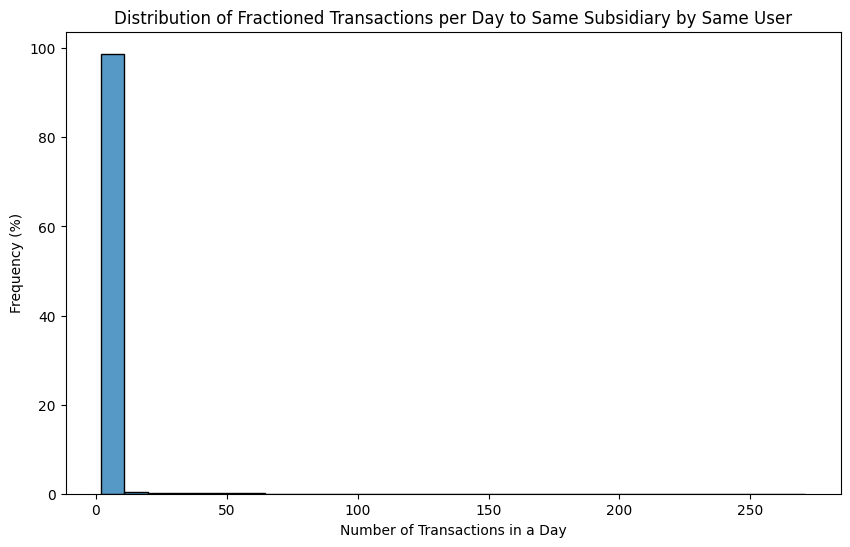

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(fractioned_transactions_subsidiary['transaction_counts'], bins=30, stat='percent')
plt.title('Distribution of Fractioned Transactions per Day to Same Subsidiary by Same User')
plt.xlabel('Number of Transactions in a Day')
plt.ylabel('Frequency (%)')
plt.show()

- Well it seems that those cases where the number of fractioned transactions is high are quite rare.
- Lets check in a small range, how the distribution looks like.

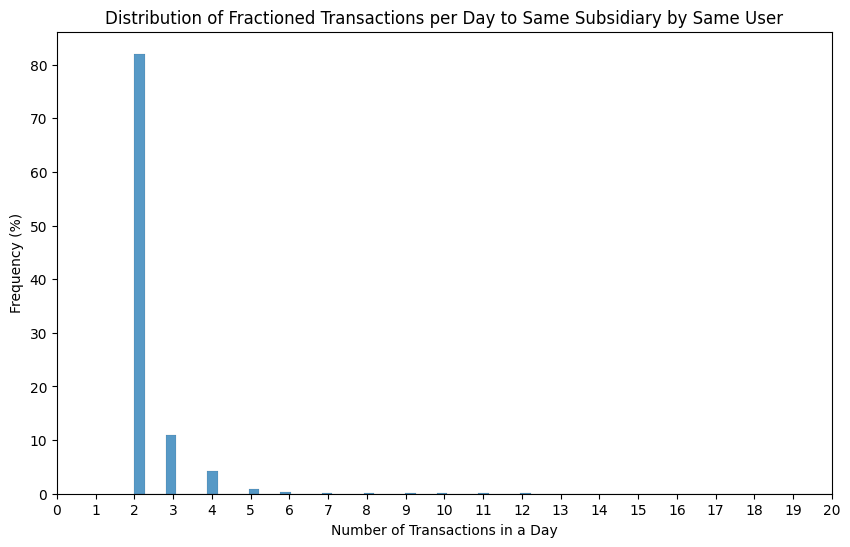

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(fractioned_transactions_subsidiary['transaction_counts'], bins=1000, stat='percent')
plt.title('Distribution of Fractioned Transactions per Day to Same Subsidiary by Same User')
plt.xlim(0, 20)
plt.xlabel('Number of Transactions in a Day')
plt.xticks(range(0, 21, 1))
plt.ylabel('Frequency (%)')
plt.show()

## So maybe those values with more than 100 transactions in a day are outliers, lets check how many of those are there

- What is the percentile of those outliers?
- Which is greater between 99 percentile and 1.5 times the IQR?

So the q3 and q1 are the same, well this is expected from the histogram observed before. So I will use the 99th percentile as the threshold for outliers.

In [19]:
outliers = fractioned_transactions_subsidiary[fractioned_transactions_subsidiary['transaction_counts'] > 100]
print(f"Number of outliers (more than 100 transactions in a day): {outliers.shape[0]}")

perc_100_transactions = (outliers.shape[0] / fractioned_transactions_subsidiary.shape[0]) * 100
print(f"Percentage of outliers (more than 100 transactions in a day): {perc_100_transactions:.4f}%")

percentile_99 = fractioned_transactions_subsidiary['transaction_counts'].quantile(0.99)
print(f"99th percentile of transaction counts: {percentile_99}")

q3 = fractioned_transactions_subsidiary['transaction_counts'].quantile(0.75) 
q1 = fractioned_transactions_subsidiary['transaction_counts'].quantile(0.25)
iqr = q3 - q1
print(f"IQR : {iqr}")
print(f"1.5 IQR: {iqr * 1.5}")

Number of outliers (more than 100 transactions in a day): 226
Percentage of outliers (more than 100 transactions in a day): 0.0333%
99th percentile of transaction counts: 16.0
IQR : 0.0
1.5 IQR: 0.0


### Now lets check the distribution of total transaction amount in those fractioned transactions

max amount spent in fractioned transactions: 17559.19607174
min amount spent in fractioned transactions: 11.88891002


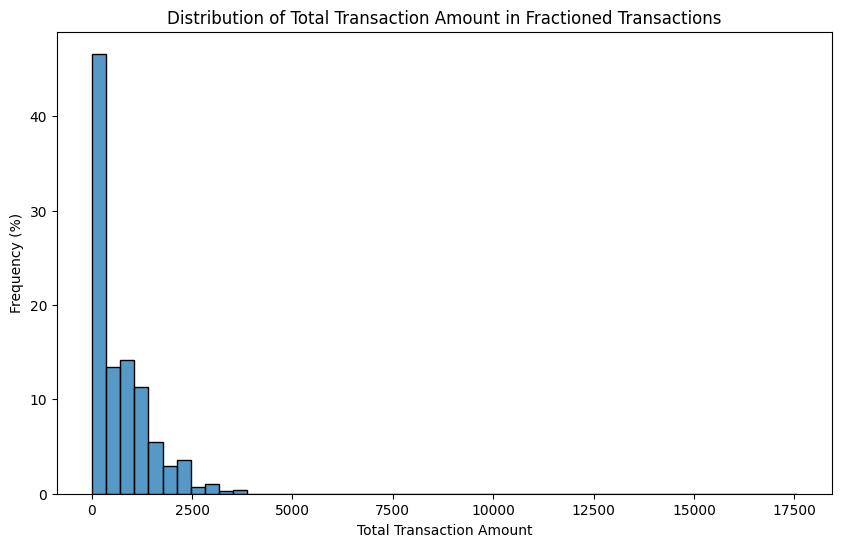

In [20]:
print(f"max amount spent in fractioned transactions: {fractioned_transactions_subsidiary['total_transaction_amount'].max()}")
print(f"min amount spent in fractioned transactions: {fractioned_transactions_subsidiary['total_transaction_amount'].min()}")

plt.figure(figsize=(10, 6))
sns.histplot(fractioned_transactions_subsidiary['total_transaction_amount'], bins=50, stat='percent')
plt.title('Distribution of Total Transaction Amount in Fractioned Transactions')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Frequency (%)')
plt.show()

In [21]:
fractioned_transactions_subsidiary['total_transaction_amount'].describe()

count    678398.000000
mean        682.569953
std         719.873051
min          11.888910
25%          95.111280
50%         475.556401
75%        1070.001902
max       17559.196072
Name: total_transaction_amount, dtype: float64

- Well, at least, the total_transaction_amount has a wide range of values, from very low to quite high amounts. But these high amounts seems to be outliers.
- Lets compute again the 99th percentile for this feature and the IQR

In [22]:
q1 = fractioned_transactions_subsidiary['total_transaction_amount'].quantile(0.25)
q3 = fractioned_transactions_subsidiary['total_transaction_amount'].quantile(0.75)
iqr = q3 - q1
print(f"IQR threshold: {iqr * 1.5}")
print(f"99th percentile of total transaction amount: {fractioned_transactions_subsidiary['total_transaction_amount'].quantile(0.99)}")

IQR threshold: 1462.33593303
99th percentile of total transaction amount: 2972.22750617


### So what with these > 5000 total transaction amounts? Are they outliers?

In [23]:
fractioned_transactions_subsidiary[fractioned_transactions_subsidiary['total_transaction_amount'] > 5000].sort_values(by='total_transaction_amount', ascending=False)

,user_id,subsidiary,transaction_day,transaction_counts,total_transaction_amount,amount_per_transaction,label
3193,cfa366b65fa843bf78ca52f9524e1244,f54e0b6b32831a6307361ed959903e76,2021-02-11,38,17559.196072,462.0,70914
4403,7cac676a8d21f4fb7a66d4966dd3a12c,f54e0b6b32831a6307361ed959903e76,2021-02-11,28,14887.895901,532.0,515924
3691,1d46b2330c1fdf739c0c3fcc511f35bc,f54e0b6b32831a6307361ed959903e76,2021-02-11,33,14276.192458,433.0,91539
10756,0290610111640c1d5b863240bb81d3b4,a322aaaff76c37cf59e21336b65507f2,2021-10-07,6,14266.692030,2378.0,387357
21350,22e351bd70fdb319bbc102f8de27b7ce,fd0f4ab622618d7c35dcb5ab8112d732,2021-08-19,4,12840.022827,3210.0,160054
...,...,...,...,...,...,...,...
17837,b375667684698355837afaaed3dad500,28ee8dcf2268438db928361a33e16d9a,2021-05-11,5,5100.342401,1020.0,138508
10957,d609299eb817095b6d918dc351c3ce09,0ca0a5d99620950537c0168a05e15e44,2021-11-23,6,5088.453491,848.0,515062
9018,af4eb2f380fff305964fc2b53ad59321,df3fc7ba2294de5b3fb5fd2109cdbda6,2021-10-30,8,5017.120030,627.0,160724
9395,1094c0fb4a41aad9f2b9e2148aac9bbf,e1ae37ab3d2f00839cdf0644ff01c419,2021-01-29,8,5017.120030,627.0,88913


# Now a very interesting distribution to check is the amount per transaction in those fractioned transactions.

Maybe it provide us some insight about user reaching some thresholds when performing fractioned transactions.

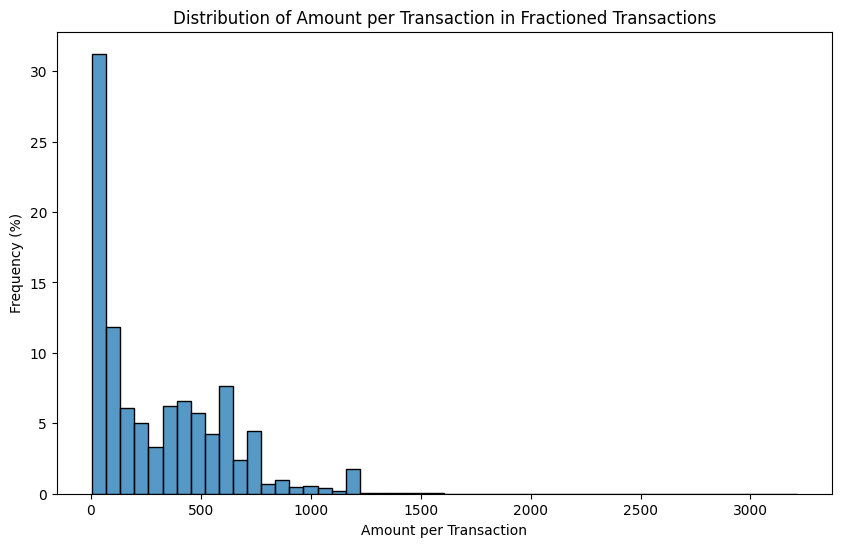

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(fractioned_transactions_subsidiary['amount_per_transaction'], bins=50, stat='percent')
plt.title('Distribution of Amount per Transaction in Fractioned Transactions')
plt.xlabel('Amount per Transaction')
plt.ylabel('Frequency (%)')
plt.show()

**More granulated:**

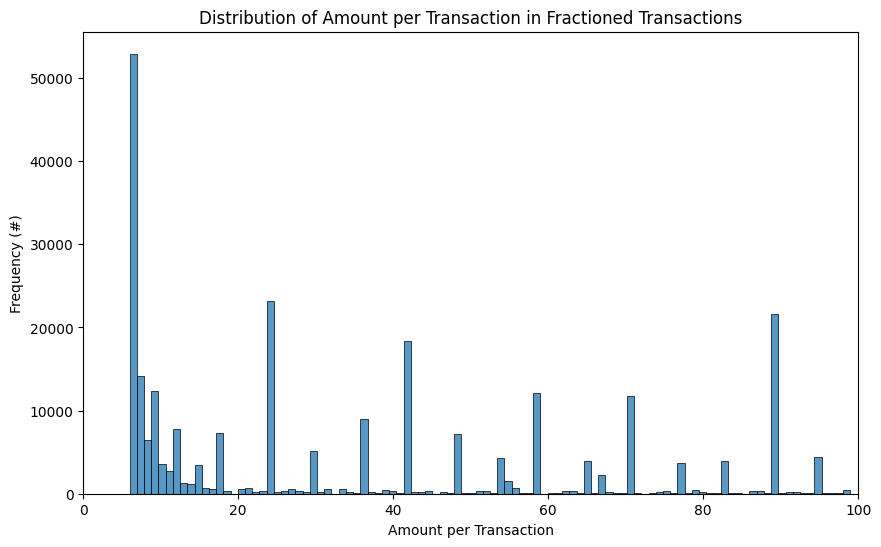

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(fractioned_transactions_subsidiary.loc[fractioned_transactions_subsidiary['amount_per_transaction'] < 100, 'amount_per_transaction'], bins=100)
plt.title('Distribution of Amount per Transaction in Fractioned Transactions')
plt.xlabel('Amount per Transaction')
plt.xlim(0, 100)
plt.ylabel('Frequency (#)')
plt.show()

In [26]:
fractioned_transactions_subsidiary['amount_per_transaction'].describe()

count    678398.000000
mean        298.875977
std         290.151629
min           6.000000
25%          42.000000
50%         208.000000
75%         505.000000
max        3210.000000
Name: amount_per_transaction, dtype: float64

I could perform the following analysis: Round the amount per transaction. Count the number of occurrences of each rounded amount per transaction. And sort them

In [27]:
amount_counts = fractioned_transactions_subsidiary['amount_per_transaction'].round().value_counts().reset_index()
amount_counts

,amount_per_transaction,count
0,6.0,52924
1,594.0,34110
2,713.0,25085
3,24.0,23170
4,89.0,21578
...,...,...
1056,605.0,1
1057,1528.0,1
1058,688.0,1
1059,653.0,1


well the 6 appear the most frequently, with more than 50k occurrences. But those micro transactions of 6 units, which appear too many times with those transactions fractioned in more than 200 times in a day, seems suspicious. I will perform the same analysis but excluding the outliers, this is, frationed transactions with 16 transactions or more in a day, 16 is selected as it represent the percentile 99th.

In [28]:
amount_counts = fractioned_transactions_subsidiary[fractioned_transactions_subsidiary['transaction_counts'] < 16]['amount_per_transaction'].value_counts().reset_index()
amount_counts

,amount_per_transaction,count
0,6.0,47932
1,594.0,34110
2,713.0,25085
3,24.0,23139
4,89.0,21578
...,...,...
1056,1063.0,1
1057,818.0,1
1058,985.0,1
1059,1831.0,1


- Well the value of 6 appears the most frequently even excluding the outliers. So it seems that this could be a transaction threshold in transactions. In fact, all the values in this table could represent some kind of threshold. So I think I will store to future use. This will be explored further, using the account_number info per user, where I expect to detect these thresholds better.

**SO** I will store this dataframe as a simple csv for future analysis, I will only store those value whose count is greater than 10k occurrences

In [29]:
amount_counts_filtered = amount_counts[amount_counts['count'] > 10000]

print(f"Number of possible thresholds amount in transactions: {amount_counts_filtered.shape[0]}")
amount_counts_filtered.to_csv('data/utils/possible_transaction_thresholds.csv', index=False)

Number of possible thresholds amount in transactions: 17


## Now I will save the fractioned transactions table to a parquet file for future analysis.

Here I will mark the outliers using as criterion the 99th percentile of transaction counts obtained (16 transactions in a day)

In [30]:
new_fractioned_trans_query = f"""
    SELECT        
        user_id,
        subsidiary,
        DATE_TRUNC('day', transaction_date) as transaction_day,
        COUNT(*) AS transaction_counts,
        ROW_NUMBER() OVER () AS label, 
        CASE WHEN COUNT(*) > 16 THEN 1 ELSE 0 END AS is_outlier
    FROM 
        '{file_1_path}'
    GROUP BY 
        user_id, 
        subsidiary, 
        DATE_TRUNC('day', transaction_date)
    HAVING
        COUNT(*) > 1
    ORDER BY 
        transaction_counts DESC
"""
fractioned_transactions_marked_outliers = con.execute(new_fractioned_trans_query).df()
fractioned_transactions_marked_outliers

,user_id,subsidiary,transaction_day,transaction_counts,label,is_outlier
0,71aa1651d9adc0b226107084fba3d71c,4f511a84e8c4b1c09991e0d876e880ce,2021-02-07,271,597198,1
1,fc794dabb3afc434e73ce67e6b9542e4,f54e0b6b32831a6307361ed959903e76,2021-02-08,200,78614,1
2,01c2e0350f7d77f4084502861b4989ff,f54e0b6b32831a6307361ed959903e76,2021-02-05,200,279931,1
3,e2d6158cc2b6467a47223cb2629f03f3,f54e0b6b32831a6307361ed959903e76,2021-02-02,200,460144,1
4,3739a3c32bf6f116edea1d45964cba92,f54e0b6b32831a6307361ed959903e76,2021-02-02,200,393679,1
...,...,...,...,...,...,...
678393,e978ccc68297bff3ed10920d29a0878f,46bf0db03a506923e2cee9a03d86c0d7,2021-11-26,2,678395,0
678394,d440a72eb71586bcf138c363273068bf,cc80323424963f8b298d1ff703d6f5d2,2021-11-02,2,678396,0
678395,0162f5e784b0956d551be40864cfd213,dfcfefde2de18886a8cd1ad9198e011b,2021-11-26,2,678397,0
678396,0fafd8fe13ca1c65ab58149045860649,97b556146b44f675898768e2684217f6,2021-11-27,2,678398,0


In [31]:
fractioned_transactions_marked_outliers['is_outlier'].value_counts()

is_outlier
0    671728
1      6670
Name: count, dtype: int64

### Ok, so lets create a new table which contain the fractioned transactions info

In [32]:
franctioned_table_path = 'data/interim/fractioned_transactions.parquet'

new_table_query = f"""
    WITH fractioned_transactions AS (
        {new_fractioned_trans_query}
    )
    SELECT 
        original._id,
        frac.label AS fractioned_label, 
        frac.is_outlier AS is_outlier
    FROM 
        '{file_1_path}' AS original
    INNER JOIN 
        fractioned_transactions AS frac
    ON 
        original.user_id = frac.user_id
        AND original.subsidiary = frac.subsidiary
        AND DATE_TRUNC('day', original.transaction_date) = frac.transaction_day        
"""
con.execute(f"COPY ({new_table_query}) TO '{franctioned_table_path}' (FORMAT PARQUET);")
print(f"Data saved to {franctioned_table_path}")

Data saved to data/interim/fractioned_transactions.parquet


#### Ok now lets check if the file was saved correctly

In [33]:
franctioned_table_path = 'data/interim/fractioned_transactions.parquet'
check_table_query = f"""
    SELECT
        *
    FROM
        '{franctioned_table_path}'
    LIMIT 10
"""
check_df = con.execute(check_table_query).df()
check_df

,_id,fractioned_label,is_outlier
0,0ce7ab2950e7a788a608f881aec0f8f0,626357,0
1,d32cb4ab941c3ebecb19cf7d24b7685a,373031,0
2,84a07b1ddbb4ad36af95de852538f07b,373031,0
3,babf9588c0ae9b33ad452033b10d5bea,96141,0
4,6b61df935e65c3e983b17afa69590572,118584,0
5,41360e65057396d7fbae670cf24c7532,96141,0
6,3ec93bb3e86ca3335b164297262a382b,648861,0
7,8ffce3441ea2e1def8cf3c975bef39d9,373031,0
8,a5ef6a1623517c3ce2c905a5f629f0d9,595860,0
9,01adaa303b60d5e7d802969a93757328,595860,0


**Check the number of registers in the new table**

In [34]:
query = f"""
    SELECT 
        COUNT(*) as total_fractioned_transactions
    FROM 
        '{franctioned_table_path}'
"""
con.execute(query).df()

,total_fractioned_transactions
0,1832878


**Yes the table was saved correctly. Now In another file I will perform the exploratory analysis.**